In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder , StandardScaler,MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,ElasticNet, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

In [35]:
kyp = pd.read_csv(r'C:\Users\Administrator.DAI-PC2\Desktop\jupiter_demo\ML\Cases-20240426T111123Z-001\Cases\Kyphosis\Kyphosis.csv')
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [36]:
#Performs one-hot encoding using pandas
le = LabelEncoder()
y=le.fit_transform(kyp['Kyphosis'])
X = kyp.drop('Kyphosis',axis=1)

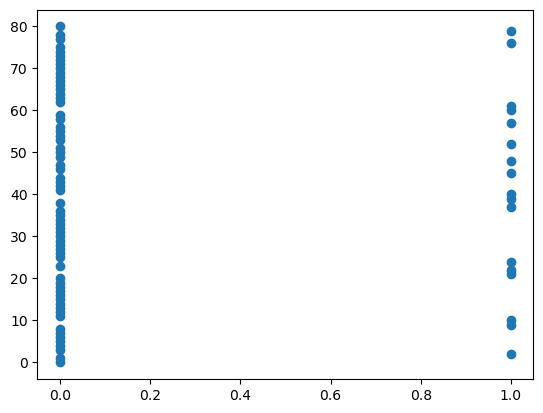

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y,kyp.index)

In [56]:
svc = SVC(kernel='poly',probability=True,random_state=24)
print(svc.get_params())
scl = StandardScaler()
mms = MinMaxScaler()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': 24, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
pipe=Pipeline([('SCL',None), ('SVC',svc)])
print(pipe.get_params())

params={'SVC__C':np.linspace(0.001,5,20), 'SCL':[scl,mms,None], 'SVC__degree':[2,3], 'SVC__coef0':np.linspace(0,3,5), 'SVC__gamma':np.linspace(0.001,5,5)}
gcv=GridSearchCV(pipe,param_grid=params,cv=kfold, scoring='neg_log_loss',verbose=2)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'memory': None, 'steps': [('SCL', None), ('SVC', SVC(kernel='poly', probability=True, random_state=24))], 'verbose': False, 'SCL': None, 'SVC': SVC(kernel='poly', probability=True, random_state=24), 'SVC__C': 1.0, 'SVC__break_ties': False, 'SVC__cache_size': 200, 'SVC__class_weight': None, 'SVC__coef0': 0.0, 'SVC__decision_function_shape': 'ovr', 'SVC__degree': 3, 'SVC__gamma': 'scale', 'SVC__kernel': 'poly', 'SVC__max_iter': -1, 'SVC__probability': True, 'SVC__random_state': 24, 'SVC__shrinking': True, 'SVC__tol': 0.001, 'SVC__verbose': False}
Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[CV] END SCL=StandardScaler(), SVC__C=0.001, SVC__coef0=0.0, SVC__degree=2, SVC__gamma=0.001; total time=   0.0s
[CV] END SCL=StandardScaler(), SVC__C=0.001, SVC__coef0=0.0, SVC__degree=2, SVC__gamma=0.001; total time=   0.0s
[CV] END SCL=StandardScaler(), SVC__C=0.001, SVC__coef0=0.0, SVC__degree=2, SVC__gamma=0.001; total time=   0.0s
[CV] END SCL=StandardScaler(), SVC__C=0.001

In [22]:
# #########Using kfold and cross_val_score
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
results = cross_val_score(svc,X,y,cv=kfold,scoring='accuracy')
print(results.mean())

0.8036764705882353


In [20]:
pd_cv = pd.DataFrame(gcv.cv_results_)
pd_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000526,0.000449,0.000000,0.000000,0.0,{'C': 0.0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
1,0.006497,0.003279,0.001595,0.000489,0.10101,{'C': 0.10101010101010101},0.705882,0.8125,0.875,0.875,0.6875,0.791176,0.080661,98
2,0.007913,0.007527,0.000996,0.000630,0.20202,{'C': 0.20202020202020202},0.705882,0.8125,0.875,0.875,0.6250,0.778676,0.098606,99
3,0.008467,0.008219,0.001098,0.000663,0.30303,{'C': 0.30303030303030304},0.705882,0.8125,0.875,0.875,0.7500,0.803676,0.067375,1
4,0.009671,0.012315,0.000000,0.000000,0.40404,{'C': 0.40404040404040403},0.705882,0.8125,0.875,0.875,0.7500,0.803676,0.067375,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.134890,0.083218,0.002113,0.004225,9.59596,{'C': 9.595959595959595},0.705882,0.8125,0.875,0.875,0.7500,0.803676,0.067375,1
96,0.156563,0.106711,0.000000,0.000000,9.69697,{'C': 9.696969696969697},0.705882,0.8125,0.875,0.875,0.7500,0.803676,0.067375,1
97,0.151898,0.102201,0.000398,0.000797,9.79798,{'C': 9.797979797979798},0.705882,0.8125,0.875,0.875,0.7500,0.803676,0.067375,1
98,0.165513,0.119879,0.003126,0.006251,9.89899,{'C': 9.8989898989899},0.705882,0.8125,0.875,0.875,0.7500,0.803676,0.067375,1
